In [1]:
#Call required libraries
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import os                     # For os related operations
import sys                    # For data size

In [2]:
wh = pd.read_csv("2015.csv") #Read the dataset
# wh.describe()
wh

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [3]:
print("Dimension of dataset: wh.shape")
wh.dtypes

Dimension of dataset: wh.shape


Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

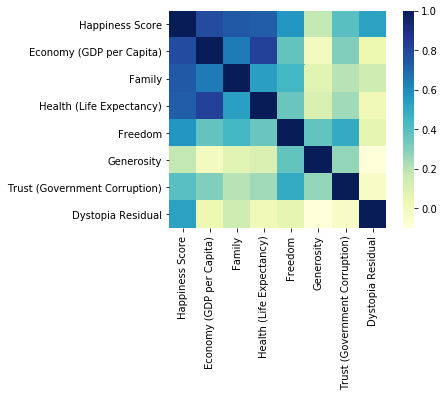

In [4]:
wh1 = wh[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)', 'Freedom', 
          'Generosity','Trust (Government Corruption)','Dystopia Residual']] #Subsetting the data
cor = wh1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True, cmap="YlGnBu") #Plot the correlation as heat map

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

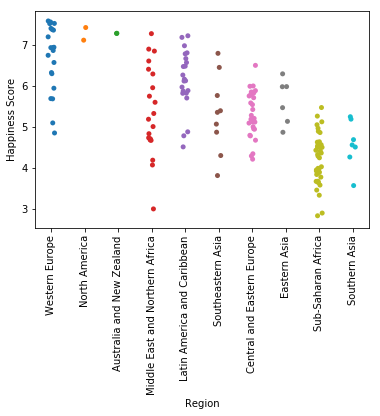

In [5]:
g = sns.stripplot(x="Region", y="Happiness Score", data=wh, jitter=True)
plt.xticks(rotation=90)

In [6]:
wh['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [7]:
data = dict(
            type = 'choropleth', 
            locations = wh['Country'],
            locationmode = 'country names',
            z = wh['Happiness Score'],
            text = wh['Happiness Rank'],
            colorscale = 'RdBu',
            colorbar = {'title':'Happiness'}
            )
layout = dict(
            title = 'Global Happiness', 
            geo = dict(
                    showframe = False, 
                    projection = go.layout.geo.Projection(type = 'equirectangular'),
#                     countrycolor = "rgb(217, 217, 217)"
                      )
             )
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# - One of the following named colorscales:
#             ['Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu',
#             'Reds', 'Blues', 'Picnic', 'Rainbow', 'Portland', 'Jet',
#             'Hot', 'Blackbody', 'Earth', 'Electric', 'Viridis', 'Cividis']

In [8]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(wh1)
    Sum_of_squared_distances.append(km.inertia_)

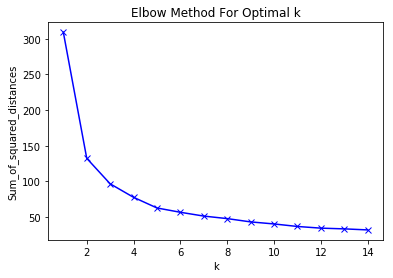

In [9]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [10]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(wh1, 3)
kmeans = pd.DataFrame(clust_labels)
try:
    wh.insert((wh.shape[1]),'kmeans',kmeans)
except:
    pass

wh.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,kmeans
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,1
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,1
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,1
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,1


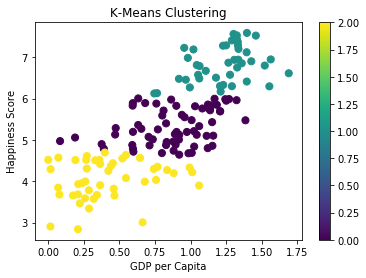

In [11]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy (GDP per Capita)'],wh1['Happiness Score'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Happiness Score')
plt.colorbar(scatter)
# ax.legend(wh1, ['Cold', 'Medium', 'Hot'])
# plt.show()

In [12]:
data = dict(
            type = 'choropleth', 
            locations = wh['Country'],
            locationmode = 'country names',
            z = wh['kmeans'], 
            text = wh['Happiness Score'],
            colorscale = 'YlOrRd',
            colorbar = {'title':'K-Means'}
            )
layout = dict(
            title = 'Global Happiness', 
            geo = dict(
                      showframe = False, 
                      projection = go.layout.geo.Projection(type = 'equirectangular'),
#                     countrycolor = "rgb(217, 217, 217)"
                      )
             )
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# - One of the following named colorscales:
#             ['Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu',
#             'Reds', 'Blues', 'Picnic', 'Rainbow', 'Portland', 'Jet',
#             'Hot', 'Blackbody', 'Earth', 'Electric', 'Viridis', 'Cividis']

In [13]:
wh.kmeans.value_counts()

0    69
2    46
1    43
Name: kmeans, dtype: int64

In [ ]:
# One-Variable Linear Regression

In [14]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

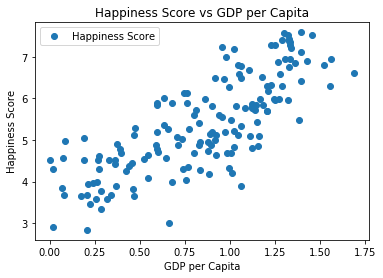

In [15]:
wh.plot(x='Economy (GDP per Capita)', y='Happiness Score', style='o')  
plt.title('Happiness Score vs GDP per Capita')  
plt.xlabel('GDP per Capita')  
plt.ylabel('Happiness Score')
# plt.legend()
plt.show()

In [16]:
X = wh['Economy (GDP per Capita)'].values.reshape(-1,1)
y = wh['Happiness Score'].values.reshape(-1,1)

# X = [[wh['Economy (GDP per Capita)']]]
# y = [[wh['Happiness Score']]]
# X = wh['Economy (GDP per Capita)']
# y = wh['Happiness Score']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

# df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# coeff_wh = pd.DataFrame(regressor.coef_, wh[''], columns=['Coefficient'])  
# coeff_wh

[3.46833494]
[[2.25846966]]


In [20]:
y_pred = regressor.predict(X_test)

In [21]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,7.364,6.475962
1,5.995,6.108283
2,4.633,4.700511
3,4.514,4.281316
4,5.716,6.037660
5,4.507,4.214172
6,4.512,3.899093
7,3.956,4.008245
8,4.686,5.746679
9,5.007,5.542762


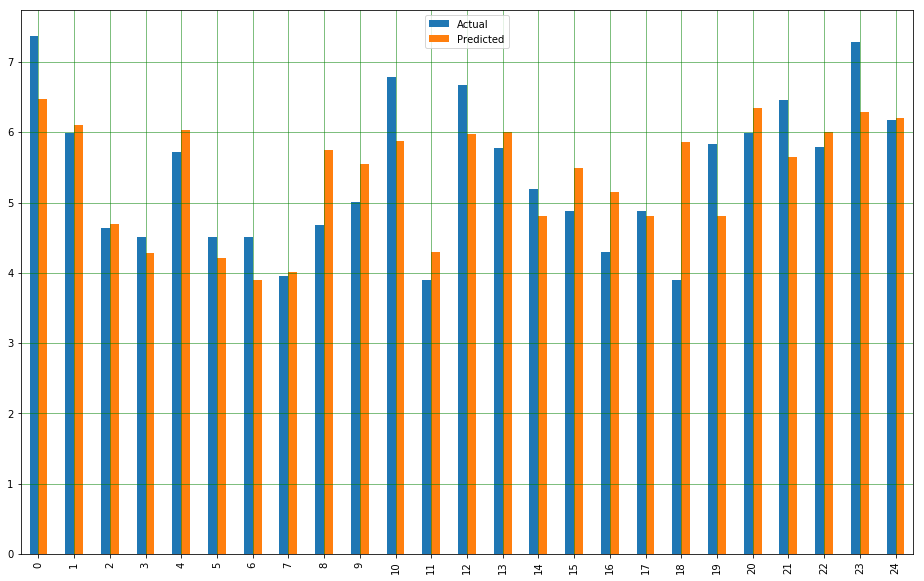

In [22]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

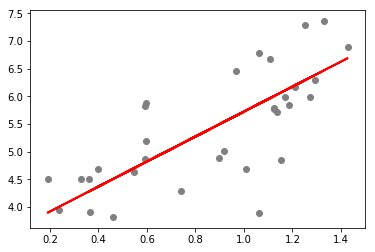

In [23]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5507832779506647
Mean Squared Error: 0.4904244941950018
Root Mean Squared Error: 0.7003031444988675


In [25]:
# Multiple Linear Regression

In [26]:
y = wh['Happiness Score']
X = wh.drop(['Happiness Score', 'Happiness Rank', 'Country', 'Region', 'kmeans'], axis=1)
X.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
coeff_wh = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_wh

,Coefficient
Standard Error,-0.001028
Economy (GDP per Capita),1.000104
Family,0.999954
Health (Life Expectancy),0.999841
Freedom,0.999678
Trust (Government Corruption),0.999896
Generosity,0.999949
Dystopia Residual,1.000035


In [29]:
y_pred = regressor.predict(X_test)

In [30]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
7,7.364,7.363588
44,5.995,5.995098
113,4.633,4.633491
120,4.514,4.514393
63,5.716,5.715901
122,4.507,4.507214
121,4.512,4.512311
139,3.956,3.955667
109,4.686,4.685580
92,5.007,5.007033


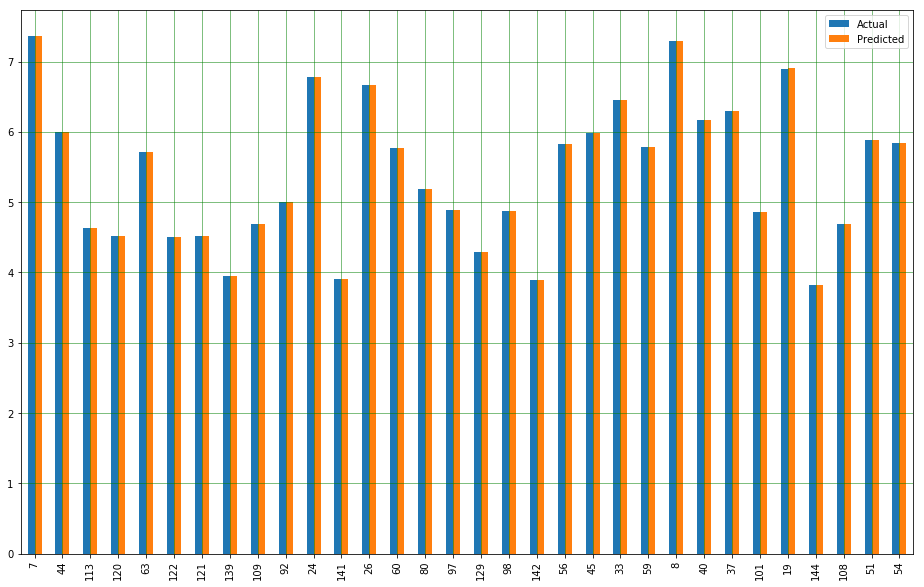

In [31]:
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0002727421285902837
Mean Squared Error: 1.0074279363535812e-07
Root Mean Squared Error: 0.0003174000529857519
